In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
dt_train=pd.read_csv('train.csv')
dt_test=pd.read_csv('test.csv')
dt_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


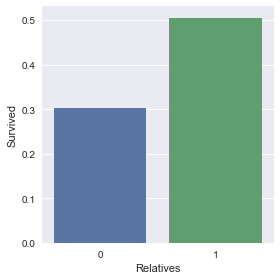

In [140]:
dt_train_p=dt_train.drop(['Name','Ticket','Cabin'],axis=1)
dt_test_p=dt_test.drop(['Name','Ticket','Cabin'],axis=1)
def check_is_child(data):
    age,sex=data
    if age<16.0:
        return 'Child'
    else:
        return sex

def relative_standardlize(data):
    SibSp,Parch=data
    if SibSp+Parch>0:
        return 1
    else:
        return 0
dt_train_p["Person"]=dt_train_p[['Age','Sex']].apply(check_is_child,axis=1)
dt_test_p["Person"]=dt_test_p[['Age','Sex']].apply(check_is_child,axis=1)
dt_test_p["Relatives"]=dt_test_p[['SibSp','Parch']].apply(relative_standardlize,axis=1)
dt_train_p["Relatives"]=dt_train_p[['SibSp','Parch']].apply(relative_standardlize,axis=1)

#calculate Survival Rate
dt_grouped=dt_train_p.groupby(['Relatives'],as_index=False)
result_data=dt_grouped.sum()

Surviv_Rate=((dt_grouped.sum()['Survived'])/(dt_grouped.count()['Survived']))
result_data['Survived']=Surviv_Rate
result_data['Relatives']
sns.factorplot(y='Survived',x='Relatives',data=result_data,kind='bar')


In [ ]:
#GET THE Survival Rate
#because survivied will record to 1,else record to 0 ,so sum will represent survivied and count will represent total
Pclass_Gender_grouped=dt_train_p.groupby(['Person','Pclass'],as_index=False)
#Pclass_Gender_group
PG_Survival_Rate=(Pclass_Gender_grouped.sum()['Survived']/Pclass_Gender_grouped.count()['Survived'])
sum_result=Pclass_Gender_grouped.sum()
sum_result['Survived']=PG_Survival_Rate

In [97]:
sum_result

,Person,Pclass,PassengerId,Survived,Age,SibSp,Parch,Fare
0,Child,1,2979,0.833333,46.92,4,11,836.2958
1,Child,2,8128,1.000000,86.33,15,24,538.1542
2,Child,3,24716,0.431034,395.42,125,70,1346.7710
3,female,1,42682,0.978022,2911.00,50,38,9492.9375
4,female,2,29720,0.909091,2059.50,30,33,1377.3292
5,female,3,45060,0.491228,2005.50,83,82,1750.3960
6,male,1,54044,0.352941,4153.50,36,28,7848.1792
7,male,2,44208,0.080808,3023.00,29,13,1886.3583
8,male,3,145849,0.119122,6524.00,94,41,3617.5281


In [98]:
Pclass_Gender_grouped.count()
PG_Survival_Rate

0    0.833333
1    1.000000
2    0.431034
3    0.978022
4    0.909091
5    0.491228
6    0.352941
7    0.080808
8    0.119122
Name: Survived, dtype: float64

,Person,Pclass,PassengerId,Survived,Age,SibSp,Parch,Fare
0,Child,1,2979,5,46.92,4,11,836.2958
1,Child,2,8128,19,86.33,15,24,538.1542
2,Child,3,24716,25,395.42,125,70,1346.7710
3,female,1,42682,89,2911.00,50,38,9492.9375
4,female,2,29720,60,2059.50,30,33,1377.3292
5,female,3,45060,56,2005.50,83,82,1750.3960
6,male,1,54044,42,4153.50,36,28,7848.1792
7,male,2,44208,8,3023.00,29,13,1886.3583
8,male,3,145849,38,6524.00,94,41,3617.5281


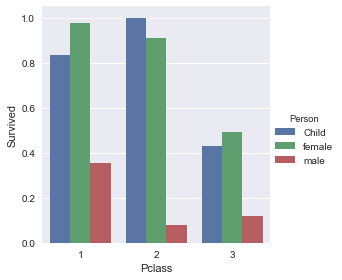

In [99]:
sns.factorplot(y='Survived',x='Pclass',data=sum_result,hue='Person',kind='bar')
Pclass_Gender_grouped.sum()

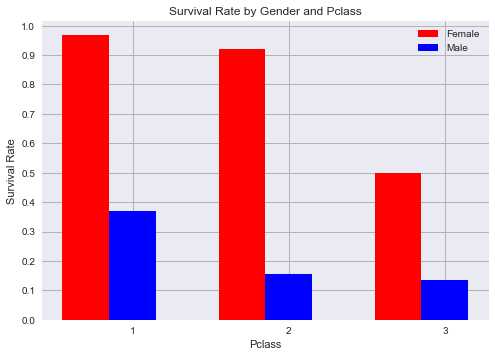

In [31]:
x=np.array([1,2,3])  
width=0.3  
plt.bar(x-width,PG_Survival_Rate.female,width,color='r')  
plt.bar(x,PG_Survival_Rate.male,width,color='b')  
plt.title('Survival Rate by Gender and Pclass')  
plt.xlabel('Pclass')  
plt.ylabel('Survival Rate')  
plt.xticks([1,2,3])  
plt.yticks(np.arange(0.0, 1.1, 0.1))  
plt.grid(True,linestyle='-',color='0.7')  
plt.legend(['Female','Male'])  
plt.show()  #画图  

In [33]:

age_train_p=dt_train_p[~np.isnan(dt_train_p['Age'])]  #去除年龄数据中的NaN  
ages=np.arange(0,85,5)  #0~85岁，每5岁一段（年龄最大80岁）  
age_cut=pd.cut(age_train_p.Age,ages)  
age_cut_grouped=age_train_p.groupby(age_cut)  #这个cut卡了我好久，后来才知道可以直接传给groupby  
age_Survival_Rate=(age_cut_grouped.sum()/age_cut_grouped.count())['Survived']  #计算每年龄段的存活率  
age_count=age_cut_grouped.count()['Survived']  #计算每年龄段的总人数  

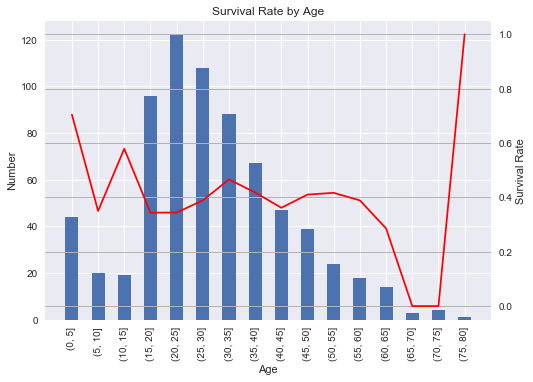

In [34]:
ax1=age_count.plot(kind='bar')  
ax2=ax1.twinx()  #使两者共用X轴  
ax2.plot(age_Survival_Rate.values,color='r')  
ax1.set_xlabel('Age')  
ax1.set_ylabel('Number')  
ax2.set_ylabel('Survival Rate')  
plt.title('Survival Rate by Age')  
plt.grid(True,linestyle='-',color='0.7')  
plt.show()  